# License Plate Recognition

@misc{
license-plate-recognition-rxg4e_dataset,
title = { License Plate Recognition Dataset },
type = { Open Source Dataset },
author = { Roboflow Universe Projects },
howpublished = { \url{ https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e } },
url = { https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e },
journal = { Roboflow Universe },
publisher = { Roboflow },
year = { 2024 },
month = { oct },
note = { visited on 2025-02-17 },
}

## Imports

In [2]:
from tqdm.notebook import tqdm

from dotenv import load_dotenv
load_dotenv()

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU'), tf.__version__

([PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')], '2.15.1')

In [3]:
# import the label map utility module
from object_detection.utils import label_map_util

# import module for reading and updating configuration files.
from object_detection.utils import config_util

# import module for visualization. use the alias `viz_utils`
from object_detection.utils import visualization_utils as viz_utils

# import module for building the detection model
from object_detection.builders import model_builder

In [ ]:
# auto reload dotenv 
%load_ext dotenv
%dotenv

# auto reload libs
%load_ext autoreload
%autoreload 2

: 

: 

: 

: 

In [ ]:
from utils.visualization_funcs import plot_random_images_bbox
from utils.annotation_processor import AnnotationProcessor

: 

: 

: 

: 

## Paths Setup

In [4]:
from hydra import initialize, compose

# https://gist.github.com/bdsaglam/586704a98336a0cf0a65a6e7c247d248

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
    print(cfg.DATASET_DIRS.TRAIN_DIR)

datasets/License-Plate-Recognition-8/train/


In [ ]:
cfg.DATASET_DIRS

: 

: 

: 

: 

: 

: 

: 

In [5]:
from pathlib import Path

DATASET_DIRS = Path(cfg.DATASET.DATASET_DIR)
DATASET_DIRS.mkdir(parents=True, exist_ok=True)

TRAIN_DIR = Path(cfg.DATASET_DIRS.TRAIN_DIR)
VALIDATION_DIR = Path(cfg.DATASET_DIRS.VALIDATION_DIR)
TEST_DIR = Path(cfg.DATASET_DIRS.TEST_DIR)

IMG_SIZE = cfg.TRAIN.IMG_SIZE
BATCH_SIZE = cfg.TRAIN.BATCH_SIZE

ANNOT_FILE_PATH = TRAIN_DIR / cfg.DATASET.ANNOTATION_FILE_NAME
ANNOT_FILE_PATH

PosixPath('datasets/License-Plate-Recognition-8/train/_annotations.csv')

In [6]:
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """

    image_np_with_annotations = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)

    if image_name:
        plt.imsave(image_name, image_np_with_annotations)

    else:
        plt.imshow(image_np_with_annotations)

## Dataset Download from Roboflow

In [7]:
if len(list(DATASET_DIRS.iterdir())) == 0:
    from roboflow import Roboflow
    rf = Roboflow()
    project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
    version = project.version(8)
    dataset = version.download(model_format="tensorflow")
                    

## Load images from directory

In [8]:
# Assign the license plate class ID
class_id = 1

# define a dictionary describing license plate class
category_index = {class_id :
{'id'  : class_id,
 'name': 'License_Plate'}
}

# Specify the number of classes that the model will predict
num_classes = 1

In [9]:
from utils.annotation_processor import AnnotationProcessor

label_map = {
    'License_Plate':1
}

prepare_train_dataset = AnnotationProcessor(annotation_file= ANNOT_FILE_PATH)

train_images, train_class_ids, train_bboxes  = prepare_train_dataset.process_annotations(image_dir=TRAIN_DIR, label_map=label_map)

len(train_images), len(train_class_ids), len(train_bboxes)


(36, 36, 36)

Random samples: [30, 5, 21, 33, 1, 9, 4, 24, 16]


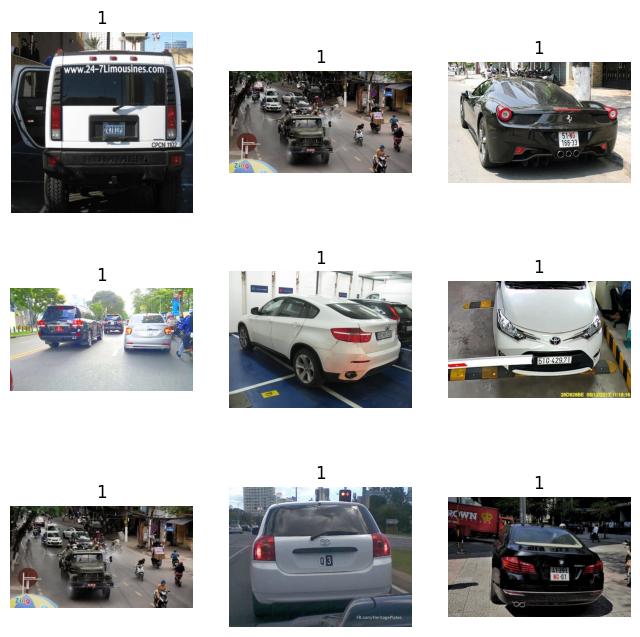

: 

: 

: 

: 

In [ ]:
%matplotlib inline
plot_random_images_bbox(image_paths=train_images, 
                        class_ids=train_class_ids, 
                        bboxes=train_bboxes,
                        class_map=label_map,
                        NUM_IMAGES_DISPLAY=9)

## Analyzing Imbalance 

In [ ]:
(classes, count) = np.unique(train_class_ids, return_counts=True)
classes, count

(array([1]), array([36]))

: 

: 

: 

: 

In [ ]:
np.unique(train_class_ids, return_counts=True)[0]

array([1])

: 

: 

: 

: 

: 

: 

: 

: 

: 